## Bivariate Analysis

* Bivariate analysis is a statistical method that helps you study relationships (correlation) between data sets

### Quantitative vs. Quantitative
    1. Scatterplot
    2. Line plot

### Categorical vs. Quantitative
    1. Bar chart (on summary statistics)
    2. Grouped kernel density plots
    3. Box plots
    4. Violin plots


### Categorical vs. Categorical
    1. Stacked bar chart
    2. Grouped bar chart
    3. Segmented bar chart


## Case study 1


### Problem Feature:(Heart Disease)

### Data Set: 

   * age - age in years 
   * sex - (1 = male; 0 = female) 
   * cp - chest pain type 
   * trestbps - resting blood pressure (in mm Hg on admission to the hospital) 
   * chol - serum cholestoral in mg/dl 
   * fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
   * restecg - resting electrocardiographic results 
   * exang - exercise induced angina (1 = yes; 0 = no) 
   * oldpeak - ST depression induced by exercise relative to rest 
   * slope - the slope of the peak exercise ST segment 
   * ca - number of major vessels (0-3) colored by flourosopy 
   * thal - 3 = normal; 6 = fixed defect; 7 = reversable defect 
   * target - have disease or not (1=yes, 0=no)



### 1.1 Loading the libraries

In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

### 1.2 import the dataset ?

In [2]:
heart = pd.read_csv('heart.csv')

### 1.3 How to see the size of your data?

In [3]:
heart.shape

(303, 14)

### 1.4 How to view the statistical characteristics of the data?

In [4]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### 1.5 How to see just one column?

In [5]:
heart['age']

0      63
1      37
2      41
3      56
4      57
5      57
6      56
7      44
8      52
9      57
10     54
11     48
12     49
13     64
14     58
15     50
16     58
17     66
18     43
19     69
20     59
21     44
22     42
23     61
24     40
25     71
26     59
27     51
28     65
29     53
       ..
273    58
274    47
275    52
276    58
277    57
278    58
279    61
280    42
281    52
282    59
283    40
284    61
285    46
286    59
287    57
288    57
289    55
290    61
291    58
292    58
293    67
294    44
295    63
296    63
297    59
298    57
299    45
300    68
301    57
302    57
Name: age, Length: 303, dtype: int64

### 1.6 How to check the column names?

In [6]:
heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

### 1.7 Find the Numerical Features,Categorical Features, Alphanumeric Features?

In [7]:
num_features = ['age','trestbps','chol','thalach','oldpeak','target']
cat_features = ['sex','cp','fbs','restecg','exang','slope','ca','thal']
an_features = []

#### Change the column names?

In [8]:
#Change the sex(0,1)=(female,male)
heart['sex'].replace({0:'female',1:'male'},inplace=True)

## 1.8 Categorical vs. Quantitative

    * Categorical: chest_pain_type, Sex, fasting_blood_sugar,rest_ecg,exercise_induced_angina,st_slope,thalassemia
    * Numerical Features: Age (Continuous), resting_blood_pressure ,cholesterol,max_heart_rate_achieved,st_depression, num_major_vessels,target

### 1.8a) Create bar plot for showing Gender and target. And your Observation:

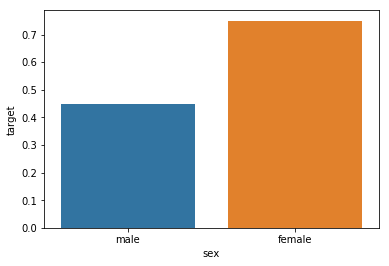

% of females with heart disease = 75.0
% of males with heart disease = 44.927536231884055


In [9]:

#draw a bar plot of target by sex
sns.barplot(x='sex',y='target',data=heart,ci=0)
plt.show()

#print percentages of females vs. males Heart Disease
print('% of females with heart disease =',heart[heart['sex'] == 'female']['target'].value_counts(normalize=True)[1]*100)
print('% of males with heart disease =',heart[heart['sex'] == 'male']['target'].value_counts(normalize=True)[1]*100)

### Observation:



- 3 in every 4 females have heart disease
- less than half of males have heart disease

### 1.8b) Create Bar plot for checking the both target vs Sex. And your Observations?

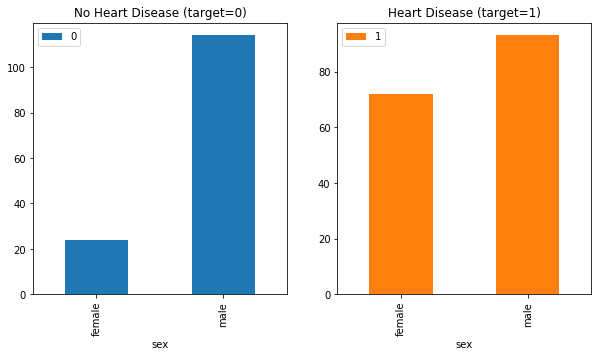

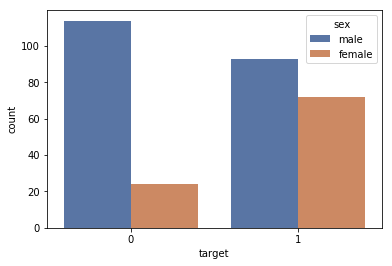

In [10]:
#create a subplot
fig,ax = plt.subplots(1,2,figsize=(10,5))

# create bar plot using groupby
heart.groupby(['target','sex']).count().iloc[:,0].unstack(0).plot(kind='bar',subplots=True,ax=ax)
ax[0].set_title('No Heart Disease (target=0)')
ax[1].set_title('Heart Disease (target=1)')
plt.show()

# create count plot
sns.countplot(x='target',hue='sex',data=heart,palette='deep')
plt.show()

#### Observation:
   

- patients with no heart disease are mostly male
- patients with heart disease are evenly divided

### 1.8d) Create Bar plot for checking the both Number Of people having chest_pain_type vs chest_pain_type:Heart Disease or Not. And your Observations?

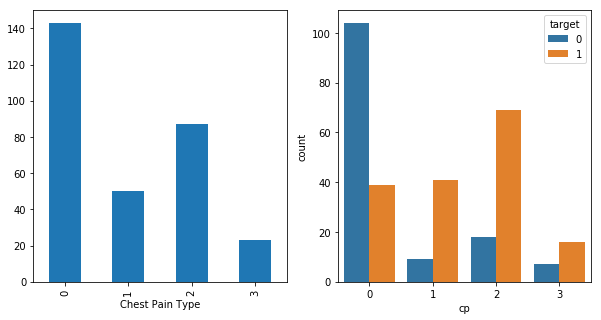

In [11]:
# create subplot plot
fig,ax = plt.subplots(1,2,figsize=(10,5))

# create bar plot using groupby
heart.groupby('cp').count().iloc[:,1].plot(kind='bar',ax=ax[0])
ax[0].set_xlabel('Chest Pain Type')

# create count plot
sns.countplot(x='cp',hue='target',data=heart,ax=ax[1])
ax[0].set_xlabel('Chest Pain Type')

plt.show()

#### Observation:

  

- Majority of patients have Chest Pain type 0
- Most patients with CP type 0 do not have any heart disease
- Most patients with CP type 1,2,3 have heart disease

### 1.8c) Create violinplot plot for checking the fasting_blood_sugar and Age vs target'. And your Observations?

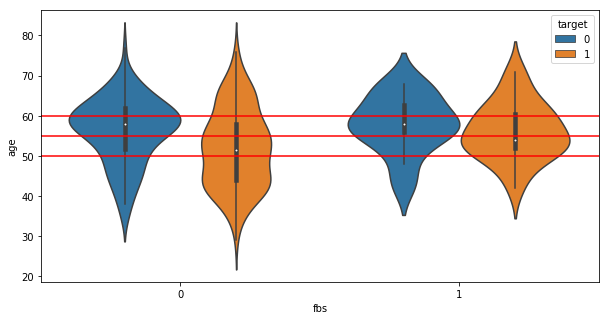

In [13]:
# create subplot plot
fig,ax = plt.subplots(1,1,figsize=(10,5))

# create violinplot plot using groupby
sns.violinplot(x='fbs',y='age',hue='target',data=heart,ax=ax)
plt.axhline(60,color='red')
plt.axhline(50,color='red')
plt.axhline(55,color='red')
plt.show()

#### Observations:
   

- for patients with fbs=0, there is more dispersion from mena than for fbs=1
- for fbs=0, target=0, mean age is approx 58
- for fbs=0, target=1, mean age is approx 50
- for fbs=1, target=0, mean age is approx 58
- for fbs=1, target=1, mean age is approx 55

## Box Plot
a box plot or boxplot is a method for graphically depicting groups of numerical data through their quartiles. Box plots may also have lines extending vertically from the boxes (whiskers) indicating variability outside the upper and lower quartiles, 

### 1.8 d)create a box plot for Sex & Age . And your Observations?

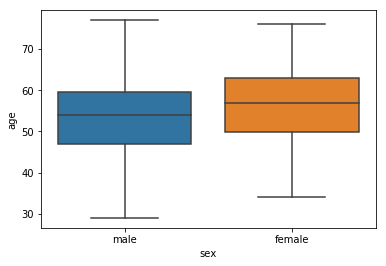

In [14]:
# create boxplot
sns.boxplot(x='sex',y='age',data=heart)
plt.show()

### Observations: 
    

- male patients are on an average slightly younger than female patients
- range for age of male patients is higher
- no outliers observed for either gender

# 1.9 Categorical vs. Categorical

* Categorical: target, Sex.

### Stacked bar chart

A stacked bar chart, also known as a stacked bar graph, is a graph that is used to break down and compare parts of a whole. Each bar in the chart represents a whole, and segments in the bar represent different parts or categories of that whole. Different colors are used to illustrate the different categories in the bar.



### 1.9a) Create a Stacked bar chart for showing target & Sex. And your Observations?

In [15]:
#create crosstab
ct = pd.crosstab(index=heart['sex'],columns=heart['target'])
ct

target,0,1
sex,,
female,24,72
male,114,93


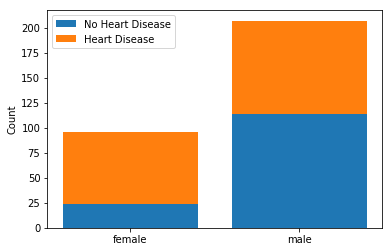

In [16]:
plt.bar(ct.index,ct[0],label='No Heart Disease')
plt.bar(ct.index,ct[1],bottom=ct[0],label='Heart Disease')
plt.ylabel('Count')
plt.legend()
plt.show()

#### Observations:
    
    

- data exists for more male pateients thatn female
- from female patients, most of them have heart disease
- from male patients, it is divided evenly between heart disease and no heart disease

# 1.10 Quantitative vs. Quantitative

### 1.10a) Create a scatter plot for showing age & st_depression. And your Observations?¶

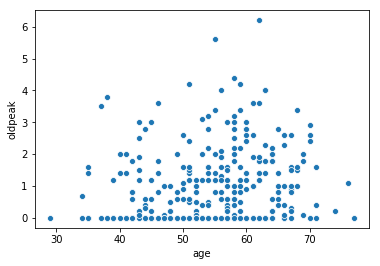

In [17]:
sns.scatterplot(x='age',y='oldpeak',data=heart)
plt.show()

Observation:
   

- points are scattered; no linear trend
- age and st_depression are not correlated

# 2. Seasonality and looking at trended data:


### 2. 1 Create a Seasonality and looking at trended data. And write your Observations?


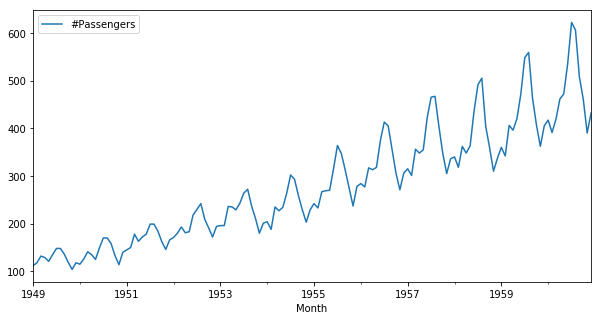

In [18]:
#Load the data = AirPassengers.csv
air = pd.read_csv('AirPassengers-1.csv', parse_dates=['Month'], index_col='Month')

# Plot subplot 
air.plot(figsize=(10,5))
plt.show()

Observations:


- Number of passengers are increasing every year
- But within a year there are ceratain fluctuations

# THE END